## Análise da Criptomoeda XRP

Dados Obtidos do Yahoo Finance

Criado por Roberto Leptich - Data: 13/05/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from platform import python_version
from pandas_datareader import data as wb

In [2]:
print('*'*40)
print('Python Version    : ', python_version())
print('Pandas Version    : ', pd.__version__)
print('Matplotlib Version: ', mpl.__version__)
print('Seaborn Version   : ', sns.__version__)
print('Plotly Version    : ', pt.__version__)
print('*'*40)

****************************************
Python Version    :  3.8.5
Pandas Version    :  1.1.3
Matplotlib Version:  3.3.2
Seaborn Version   :  0.11.0
Plotly Version    :  4.14.3
****************************************


In [3]:
# Acessando o Yahoo Finance para obter os dados da Ripple
rippleUSD = wb.DataReader('XRP-USD', data_source='yahoo', start='2014-1-1')

# Colunas do Dataset
# Date       = Data da operacao
# Open       = Preço (USD) abertura
# High       = Maior Preço (USD) na Data
# Low        = Menor Preço (USD) na Data
# Close      = Preço (USD) no fechamento
# Volume     = Volume diario de Negociacao
# Adj Close  = Valor Ajustado no Fechamento

In [4]:
# Revertendo o indice
rippleUSD = rippleUSD.sort_index(axis=0 ,ascending=False)

In [5]:
rippleUSD

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-13,1.386236,1.209457,1.209457,1.332192,1.299822e+10,1.332192
2021-05-11,1.542453,1.247864,1.479136,1.247864,9.272700e+09,1.247864
2021-05-10,1.486860,1.363676,1.391835,1.477682,7.973182e+09,1.477682
2021-05-09,1.625741,1.250003,1.534407,1.389006,1.118177e+10,1.389006
2021-05-08,1.593415,1.444127,1.563479,1.535293,8.243080e+09,1.535293
...,...,...,...,...,...,...
2014-09-20,0.004791,0.004540,0.004768,0.004570,3.095710e+05,0.004570
2014-09-19,0.004954,0.004736,0.004942,0.004772,3.226210e+05,0.004772
2014-09-18,0.005167,0.004873,0.005134,0.004942,4.071090e+05,0.004942


In [6]:
#Taxa Simples de Retorno (Simple Rate Return)
# (Preco Atual / Preco dia anterior) - 1
rippleUSD['Simple_Return'] = (rippleUSD['Adj Close'] / rippleUSD['Adj Close'].shift(1)) - 1
rippleUSD

,High,Low,Open,Close,Volume,Adj Close,Simple_Return
Date,,,,,,,
2021-05-13,1.386236,1.209457,1.209457,1.332192,1.299822e+10,1.332192,NaN
2021-05-11,1.542453,1.247864,1.479136,1.247864,9.272700e+09,1.247864,-0.063300
2021-05-10,1.486860,1.363676,1.391835,1.477682,7.973182e+09,1.477682,0.184169
2021-05-09,1.625741,1.250003,1.534407,1.389006,1.118177e+10,1.389006,-0.060010
2021-05-08,1.593415,1.444127,1.563479,1.535293,8.243080e+09,1.535293,0.105318
...,...,...,...,...,...,...,...
2014-09-20,0.004791,0.004540,0.004768,0.004570,3.095710e+05,0.004570,-0.018682
2014-09-19,0.004954,0.004736,0.004942,0.004772,3.226210e+05,0.004772,0.044201
2014-09-18,0.005167,0.004873,0.005134,0.004942,4.071090e+05,0.004942,0.035624


<AxesSubplot:xlabel='Date'>

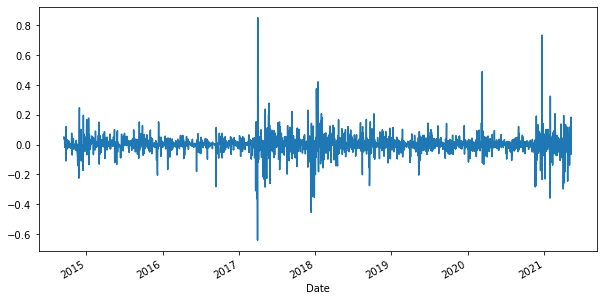

In [7]:
rippleUSD['Simple_Return'].plot(figsize=(10,5))

In [8]:
# Media Retorno diario
avg_return_d = rippleUSD['Simple_Return'].mean()
avg_return_d

-7.16195273084517e-05

In [9]:
# Media Retorno anual - Considerando 365 dias - Se fosse ação cerca de 250 d.u.
avg_return_a = rippleUSD['Simple_Return'].mean() * 365
display(avg_return_a)
print(str(round(avg_return_a, 5) * 100) + ' %')

-0.02614112746758487

-2.614 %


In [10]:
# Taxa de retorno logaritmico
# log(Preco Atual / Preco dia anterior) 
rippleUSD['Log_Return'] = np.log(rippleUSD['Adj Close'] / rippleUSD['Adj Close'].shift(1))
rippleUSD

,High,Low,Open,Close,Volume,Adj Close,Simple_Return,Log_Return
Date,,,,,,,,
2021-05-13,1.386236,1.209457,1.209457,1.332192,1.299822e+10,1.332192,NaN,NaN
2021-05-11,1.542453,1.247864,1.479136,1.247864,9.272700e+09,1.247864,-0.063300,-0.065393
2021-05-10,1.486860,1.363676,1.391835,1.477682,7.973182e+09,1.477682,0.184169,0.169041
2021-05-09,1.625741,1.250003,1.534407,1.389006,1.118177e+10,1.389006,-0.060010,-0.061886
2021-05-08,1.593415,1.444127,1.563479,1.535293,8.243080e+09,1.535293,0.105318,0.100133
...,...,...,...,...,...,...,...,...
2014-09-20,0.004791,0.004540,0.004768,0.004570,3.095710e+05,0.004570,-0.018682,-0.018858
2014-09-19,0.004954,0.004736,0.004942,0.004772,3.226210e+05,0.004772,0.044201,0.043252
2014-09-18,0.005167,0.004873,0.005134,0.004942,4.071090e+05,0.004942,0.035624,0.035005


<AxesSubplot:xlabel='Date'>

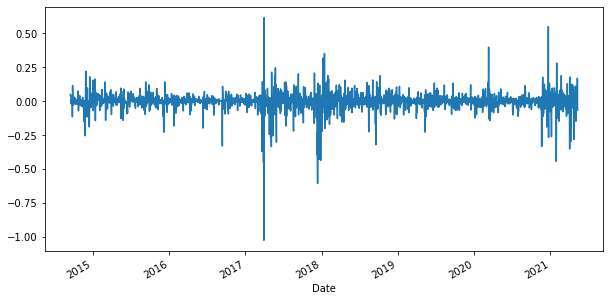

In [11]:
rippleUSD['Log_Return'].plot(figsize=(10,5))

In [12]:
# Media Retorno diario Log Return
avg_log_return_d = rippleUSD['Log_Return'].mean()
avg_log_return_d

-0.0022705554322829044

In [13]:
# Media Retorno anual Log Return - Considerando 365 dias - Se fosse ação cerca de 250 d.u.
avg_log_return_a = rippleUSD['Log_Return'].mean() * 365
display(avg_log_return_a)
print(str(round(avg_log_return_a, 5) * 100) + ' %')

-0.8287527327832601

-82.875 %


In [14]:
# Verifica o Shape do Dataset (Linhas e Colunas)
print('Shape', rippleUSD.shape)

Shape (2427, 8)


In [15]:
# Olhar primeiros 5 registros do DataSet
rippleUSD.head(5)

,High,Low,Open,Close,Volume,Adj Close,Simple_Return,Log_Return
Date,,,,,,,,
2021-05-13,1.386236,1.209457,1.209457,1.332192,1.299822e+10,1.332192,NaN,NaN
2021-05-11,1.542453,1.247864,1.479136,1.247864,9.272700e+09,1.247864,-0.063300,-0.065393
2021-05-10,1.486860,1.363676,1.391835,1.477682,7.973182e+09,1.477682,0.184169,0.169041
2021-05-09,1.625741,1.250003,1.534407,1.389006,1.118177e+10,1.389006,-0.060010,-0.061886
2021-05-08,1.593415,1.444127,1.563479,1.535293,8.243080e+09,1.535293,0.105318,0.100133


In [16]:
# Verificando valos NaN
rippleUSD.isnull().sum()

High             0
Low              0
Open             0
Close            0
Volume           0
Adj Close        0
Simple_Return    1
Log_Return       1
dtype: int64

In [17]:
# Setando valor NaN para zero
rippleUSD.fillna(0,inplace=True)

In [18]:
# Olhar os 5 últimos registros do Dataset
rippleUSD.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Simple_Return,Log_Return
Date,,,,,,,,
2014-09-20,0.004791,0.004540,0.004768,0.004570,309571.0,0.004570,-0.018682,-0.018858
2014-09-19,0.004954,0.004736,0.004942,0.004772,322621.0,0.004772,0.044201,0.043252
2014-09-18,0.005167,0.004873,0.005134,0.004942,407109.0,0.004942,0.035624,0.035005
2014-09-17,0.005521,0.005091,0.005398,0.005135,491147.0,0.005135,0.039053,0.038310
2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960.0,0.005399,0.051412,0.050134


In [19]:
# Analisar tipos de dados das colunas e verificar valores ausentes
rippleUSD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2427 entries, 2021-05-13 to 2014-09-16
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   High           2427 non-null   float64
 1   Low            2427 non-null   float64
 2   Open           2427 non-null   float64
 3   Close          2427 non-null   float64
 4   Volume         2427 non-null   float64
 5   Adj Close      2427 non-null   float64
 6   Simple_Return  2427 non-null   float64
 7   Log_Return     2427 non-null   float64
dtypes: float64(8)
memory usage: 170.6 KB


In [20]:
rippleUSD.describe()

,High,Low,Open,Close,Volume,Adj Close,Simple_Return,Log_Return
count,2427.000000,2427.000000,2427.000000,2427.000000,2.427000e+03,2427.000000,2427.000000,2427.000000
mean,0.270327,0.244058,0.257167,0.257743,1.377736e+09,0.257743,-0.000072,-0.002270
std,0.369382,0.313873,0.341008,0.341733,3.275334e+09,0.341733,0.065182,0.067613
min,0.004189,0.004041,0.004091,0.004090,2.481900e+04,0.004090,-0.642048,-1.027356
25%,0.008070,0.007860,0.007966,0.007971,9.825790e+05,0.007971,-0.019065,-0.019249
50%,0.220074,0.203679,0.212097,0.212235,2.582980e+08,0.212235,0.002096,0.002094
75%,0.334205,0.314717,0.323608,0.323666,1.338479e+09,0.323666,0.020485,0.020278
max,3.841940,3.117340,3.363570,3.377810,3.695518e+10,3.377810,0.852012,0.616273


In [21]:
minPrice = rippleUSD['Adj Close'].min()
maxPrice = rippleUSD['Adj Close'].max()
minData  = rippleUSD[rippleUSD['Adj Close'] == minPrice]
maxData  = rippleUSD[rippleUSD['Adj Close'] == maxPrice]

print('RIPPLE Menor Preço: ', minPrice)
print('RIPPLE Valor Preço: ', maxPrice)

RIPPLE Menor Preço:  0.004089999943971634
RIPPLE Valor Preço:  3.377810001373291


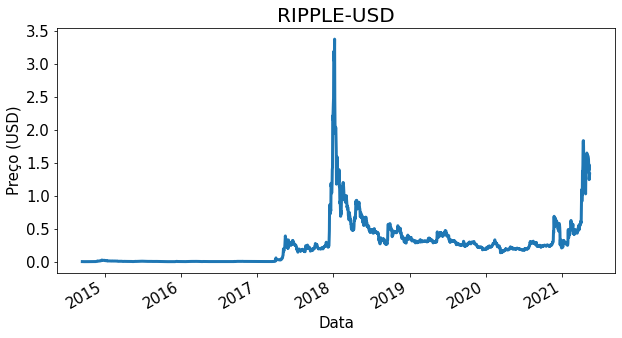

In [22]:
# Grafico do crescimento do Preço ao longo do tempo
plt.figure(figsize=(10,5))
rippleUSD['Adj Close'].plot(linewidth = 3)
plt.ylabel('Preço (USD)', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Data', fontsize=15)
plt.xticks(fontsize=15)
plt.title('RIPPLE-USD', fontsize=20)
plt.show()

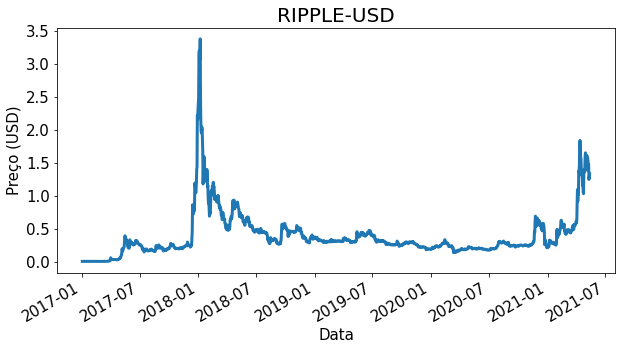

In [23]:
# Grafico do crescimento do Preço ao longo do tempo (Descartando dados de 2014 ao final 2016)
plt.figure(figsize=(10,5))
rippleUSD[:'2017-01-01'].Close.plot(linewidth = 3)
plt.ylabel('Preço (USD)', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Data', fontsize=15)
plt.xticks(fontsize=15)
plt.title('RIPPLE-USD', fontsize=20)
plt.show()

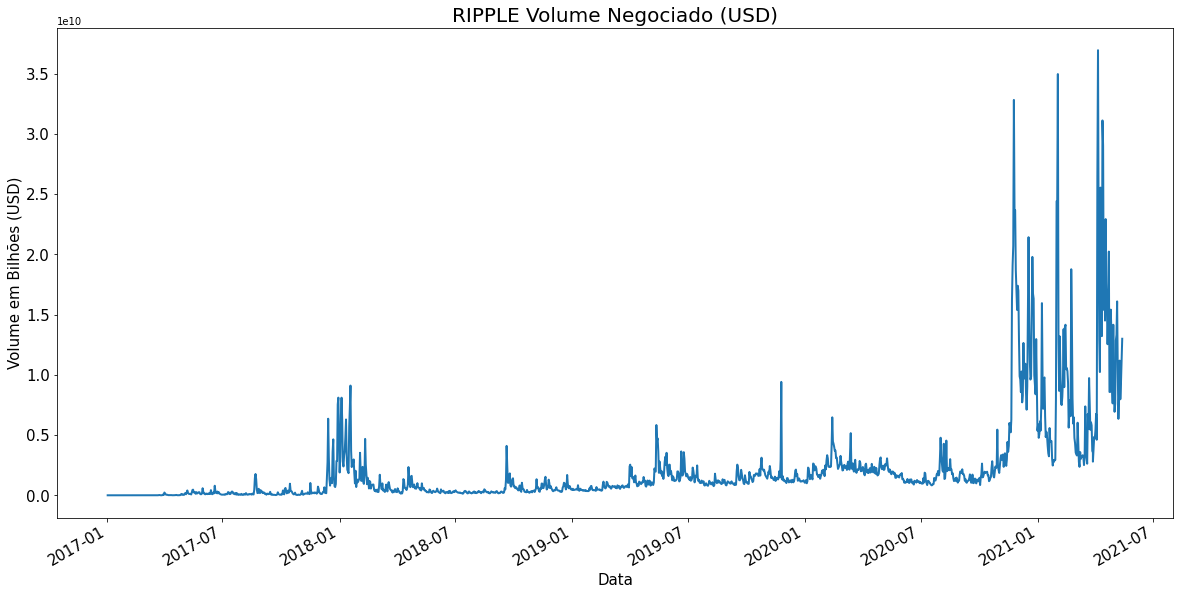

In [24]:
# Volume (bilhoes de dolares) ao longo do tempo
plt.figure(figsize=(20,10))
rippleUSD[:'2017-01-01'].Volume.plot(linewidth = 2)
plt.ylabel('Volume em Bilhões (USD)', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Data', fontsize=15)
plt.xticks(fontsize=15)
plt.title('RIPPLE Volume Negociado (USD)', fontsize=20)
plt.show()

In [25]:
# Analise do Candlestick no mes Abril 2021
trace = go.Candlestick(x=rippleUSD['2021-04-30':'2021-04-01'].index,
                open=rippleUSD['2021-04-30':'2021-04-01'].Open,
                high=rippleUSD['2021-04-30':'2021-04-01'].High,
                low=rippleUSD['2021-04-30':'2021-04-01'].Low,
                close=rippleUSD['2021-04-30':'2021-04-01'].Close)

layout = go.Layout(
    title='RIPPLE Candlestick Abril 2021',
    xaxis=dict(
        title='Tempo',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Preço (USD)',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='RIPPLE Candlestick Abril 2021')

In [26]:
# Analise do Candlestick no 2021
trace = go.Candlestick(x=rippleUSD[:'2021-01-01'].index,
                open=rippleUSD[:'2021-01-01'].Open,
                high=rippleUSD[:'2021-01-01'].High,
                low=rippleUSD[:'2021-01-01'].Low,
                close=rippleUSD[:'2021-01-01'].Close)

layout = go.Layout(
    title='RIPPLE Candlestick 2021',
    xaxis=dict(
        title='Tempo',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Preço (USD)',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='RIPPLE Candlestick 2021')

In [27]:
# Maior valor de fechamento - Data da ocorrência
display(maxData)

,High,Low,Open,Close,Volume,Adj Close,Simple_Return,Log_Return
Date,,,,,,,,
2018-01-07,3.48725,3.08382,3.09296,3.37781,2.395150e+09,3.37781,0.375212,0.318608


In [28]:
#ripple Volume vs USD visualization
trace = go.Scattergl(
    y = rippleUSD['Volume'].astype(float),
    x = rippleUSD['Adj Close'].astype(float),
    mode = 'markers',
    marker = dict(
        color = '#00a1a1',
        line = dict(width = 1)))

layout = go.Layout(
    title='RIPPLE - Volume x USD',
    xaxis=dict(
        title='Preço Fechamento (USD)',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title=' Volume Diário ',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='compareVolumeUsd')

### Desvio padrão. 

É um parâmetro muito usado em estatística que indica o grau de variação de um conjunto de elementos. 

O desvio padrão indica o quanto um conjunto de dados é uniforme. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados.

In [29]:
# Desvio padrão diario
rippleUSD['Log_Return'].std()

0.06761274384326323

In [30]:
# Desvio padrão anual considerando 365 d.u. (Volatilidade)
rippleUSD['Log_Return'].std() * 365 ** 0.5

1.2917396573827777

In [31]:
# Variacia Ripple
ripple_var = rippleUSD['Log_Return'].var()
ripple_var

0.00457148313001473

In [32]:
# Variacia Ripple Anual
ripple_var_anual = rippleUSD['Log_Return'].var() * 365
ripple_var_anual

1.6685913424553764

## Analise Bitcoin

In [33]:
# Acessando o Yahoo Finance para obter os dados da Ripple
bitcoinUSD = wb.DataReader('BTC-USD', data_source='yahoo', start='2014-1-1')

In [34]:
# Taxa de retorno logaritmico
# log(Preco Atual / Preco dia anterior) 
bitcoinUSD['Log_Return'] = np.log(bitcoinUSD['Adj Close'] / bitcoinUSD['Adj Close'].shift(1))
bitcoinUSD

,High,Low,Open,Close,Volume,Adj Close,Log_Return
Date,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,NaN
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,-0.074643
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,-0.072402
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,0.035111
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,-0.024968
...,...,...,...,...,...,...,...
2021-05-08,59210.882812,56482.003906,58877.390625,58232.316406,6.590669e+10,58232.316406,-0.009766
2021-05-09,59519.355469,54071.457031,58250.871094,55859.796875,7.177655e+10,55859.796875,-0.041596
2021-05-10,56872.542969,54608.652344,55847.242188,56704.574219,6.130840e+10,56704.574219,0.015010


<AxesSubplot:xlabel='Date'>

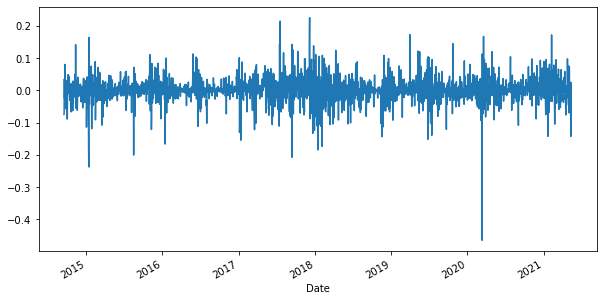

In [35]:
bitcoinUSD['Log_Return'].plot(figsize=(10,5))

In [36]:
# Media Retorno diario Log Return
avg_log_return_bit_d = bitcoinUSD['Log_Return'].mean()
avg_log_return_bit_d

0.001937823625209474

In [37]:
# Media Retorno anual Log Return - Considerando 365 dias - Se fosse ação cerca de 250 d.u.
avg_log_return_bit_a = bitcoinUSD['Log_Return'].mean() * 365
display(avg_log_return_bit_a)
print(str(round(avg_log_return_bit_a, 5) * 100) + ' %')

0.7073056232014581

70.731 %


In [38]:
# Variacia Bitcoin
bitcoin_var = bitcoinUSD['Log_Return'].var()
bitcoin_var

0.0015509807090297034

In [39]:
# Variacia Bitcoin
bitcoin_var_anual = bitcoinUSD['Log_Return'].var() * 365
bitcoin_var_anual

0.5661079587958417

In [40]:
tickers = ['XRP-USD', 'BTC-USD']
dados = pd.DataFrame()
for t in tickers:
    dados[t] = wb.DataReader(t, data_source='yahoo', start='2019-1-1')['Adj Close']

In [41]:
dados.corr()

,XRP-USD,BTC-USD
XRP-USD,1.0000,0.7141
BTC-USD,0.7141,1.0000


<AxesSubplot:xlabel='Date'>

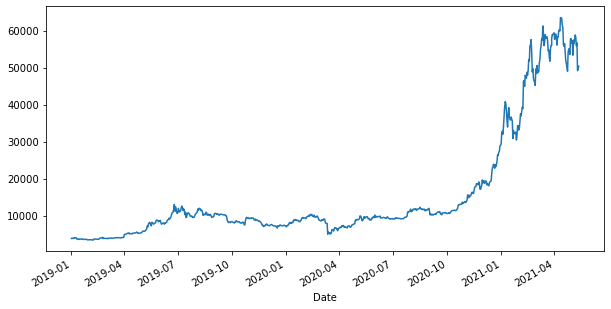

In [42]:
dados['BTC-USD'].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

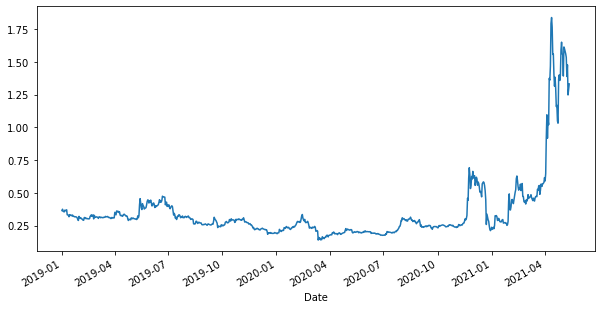

In [43]:
dados['XRP-USD'].plot(figsize=(10,5))

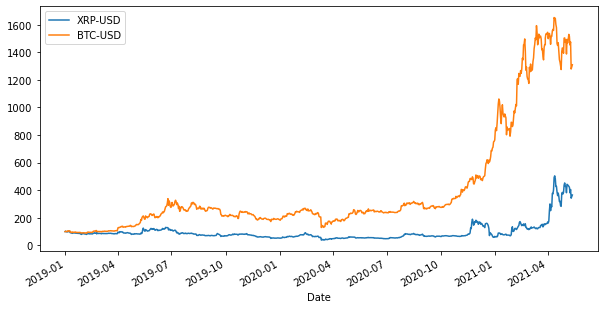

In [44]:
# Normalizar os dados Bitcoin e Ripple para base 100
(dados / dados.iloc[0] * 100).plot(figsize=(10,5));
plt.show()

In [45]:
maxHigh = rippleUSD['High'].max()
maxDataHigh  = rippleUSD[rippleUSD['High'] == maxHigh]

display(maxDataHigh)

,High,Low,Open,Close,Volume,Adj Close,Simple_Return,Log_Return
Date,,,,,,,,
2018-01-04,3.84194,3.11734,3.11734,3.19663,8.103660e+09,3.19663,0.048519,0.047379


In [46]:
maxAdjClose = rippleUSD['Adj Close'].max()
maxAdjClose  = rippleUSD[rippleUSD['Adj Close'] == maxAdjClose]

display(maxAdjClose)

,High,Low,Open,Close,Volume,Adj Close,Simple_Return,Log_Return
Date,,,,,,,,
2018-01-07,3.48725,3.08382,3.09296,3.37781,2.395150e+09,3.37781,0.375212,0.318608
